In [22]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model

In [50]:
import os
data_path='F:/Minor Project Dataset'
categories=os.listdir(data_path)
categories #['without_mask', 'with_mask']
labels=[i for i in range(len(categories))]
labels #[0,1]
label_dict=dict(zip(labels,categories))
label_dict

{0: 'without_mask', 1: 'with_mask'}

In [31]:
model =load_model('Model-013.model')

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 52900)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)               

In [33]:
image_path=r"F:\Minor Project Dataset\without_mask\2.jpg"
img=cv2.imread(image_path,1)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img.shape,gray.shape)

(433, 320, 3) (433, 320)


In [37]:
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)

In [40]:
result

array([[9.999490e-01, 5.099588e-05]], dtype=float32)

In [47]:
label=np.argmax(result,axis=1)[0]
print(label_dict[label])

without_mask


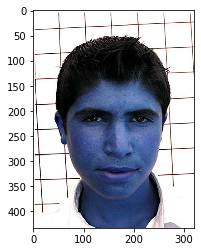

In [49]:
import matplotlib.pyplot as plt
plt.imshow(img)